# Roboflow

## Load Training Data

In [1]:
import pandas as pd

train_df = pd.read_csv('/kaggle/input/hanacaraka-roboflow/train_classes.csv')
train_df.head()

,filename,ba,ca,da,dha,ga,ha,ja,ka,la,...,na,nga,nya,pa,ra,sa,ta,tha,wa,ya
0,na_original_na4-nando-png_047b8e4a-23d2-4984-9...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,ja131-pred3_png.rf.641be3c0db040a9ef0d9ca3e764...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ka_original_ka24-mine3-rm5-png_323626c9-08f4-4...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,wa169-pred-r10_png.rf.65c4b25eba5d8f672b9639ac...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,sa148-mine-rm5_png.rf.65b2c2b62e59d2eb71afea1b...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [2]:
classes = train_df.columns[1:]

print(f"Classes: {classes}")

Classes: Index([' ba', ' ca', ' da', ' dha', ' ga', ' ha', ' ja', ' ka', ' la', ' ma',
       ' na', ' nga', ' nya', ' pa', ' ra', ' sa', ' ta', ' tha', ' wa',
       ' ya'],
      dtype='object')


In [3]:
train_df['label'] = train_df[classes].idxmax(axis=1)
train_df.drop(columns=classes, inplace=True)
train_df['filename'] = train_df['filename'].apply(lambda x: '/kaggle/input/hanacaraka-roboflow/images/' + x)

train_df.head()

,filename,label
0,/kaggle/input/hanacaraka-roboflow/images/na_or...,na
1,/kaggle/input/hanacaraka-roboflow/images/ja131...,ja
2,/kaggle/input/hanacaraka-roboflow/images/ka_or...,ka
3,/kaggle/input/hanacaraka-roboflow/images/wa169...,wa
4,/kaggle/input/hanacaraka-roboflow/images/sa148...,sa


## Load Validation Data

In [4]:
val_df = pd.read_csv('/kaggle/input/hanacaraka-roboflow/valid_classes.csv')
classes = val_df.columns[1:]
val_df['label'] = val_df[classes].idxmax(axis=1)
val_df.drop(columns=classes, inplace=True)
val_df['filename'] = val_df['filename'].apply(lambda x: '/kaggle/input/hanacaraka-roboflow/images/' + x)

val_df.head()

,filename,label
0,/kaggle/input/hanacaraka-roboflow/images/ba_or...,ba
1,/kaggle/input/hanacaraka-roboflow/images/tha_o...,tha
2,/kaggle/input/hanacaraka-roboflow/images/ca63-...,ca
3,/kaggle/input/hanacaraka-roboflow/images/wa_or...,wa
4,/kaggle/input/hanacaraka-roboflow/images/la_or...,la


## Load Testing Data

In [5]:
test_df = pd.read_csv('/kaggle/input/hanacaraka-roboflow/test_classes.csv')
classes = test_df.columns[1:]
test_df['label'] = test_df[classes].idxmax(axis=1)
test_df.drop(columns=classes, inplace=True)
test_df['filename'] = test_df['filename'].apply(lambda x: '/kaggle/input/hanacaraka-roboflow/images/' + x)

test_df.head()

,filename,label
0,/kaggle/input/hanacaraka-roboflow/images/ya_or...,ya
1,/kaggle/input/hanacaraka-roboflow/images/da86-...,da
2,/kaggle/input/hanacaraka-roboflow/images/dha_o...,dha
3,/kaggle/input/hanacaraka-roboflow/images/ka_or...,ka
4,/kaggle/input/hanacaraka-roboflow/images/tha_o...,tha


# Digital Handwritten Data (RENGGA PRAKOSO NUGROHO)

In [6]:
import os

images, labels = [], []
for dirname, _, filenames in os.walk("/kaggle/input/hanacaraka"):
    for filename in filenames:
        images.append(os.path.join(dirname, filename).split('/')[-1])
        labels.append(os.path.join(dirname, filename).split('/')[-2])

data_df = pd.DataFrame({'filename': images, 'label': labels})
data_df = data_df[data_df['label'] != 'hanacaraka']
data_df['filename'] = data_df.apply(lambda row: '/kaggle/input/hanacaraka/' + row['label'] + '/' + row['filename'], axis=1)

data_df

,filename,label
3,/kaggle/input/hanacaraka/na/469405926361532405...,na
4,/kaggle/input/hanacaraka/na/469397995902812905...,na
5,/kaggle/input/hanacaraka/na/469570221513245674...,na
6,/kaggle/input/hanacaraka/na/469581705742242041...,na
7,/kaggle/input/hanacaraka/na/469595229061566555...,na
...,...,...
1578,/kaggle/input/hanacaraka/sa/469639655111490747...,sa
1579,/kaggle/input/hanacaraka/sa/469587455281135808...,sa
1580,/kaggle/input/hanacaraka/sa/469426853742586895...,sa
1581,/kaggle/input/hanacaraka/sa/469392096155249023...,sa


# Concatenate the Roboflow Data with the Digital Handwritten Data (combine then stratified split)

In [7]:
print(f"Train: {train_df.shape[0]} | Val: {val_df.shape[0]} | Test: {test_df.shape[0]} | Data: {data_df.shape[0]}")

from sklearn.model_selection import train_test_split

all_data_df = pd.concat([train_df, val_df, test_df, data_df], ignore_index=True)
all_data_df['label'] = all_data_df['label'].apply(lambda x: x.strip())

from PIL import Image
import PIL

index = []

for i in range(len(all_data_df)):
    try:
        Image.open(all_data_df['filename'].iloc[i])

    except PIL.UnidentifiedImageError:
        index.append(i)

    except FileNotFoundError:
        index.append(i)

all_data_df.drop(index, inplace=True)

train_df, test_df = train_test_split(all_data_df, test_size=0.3, stratify=all_data_df['label'])
val_df, test_df = train_test_split(test_df, test_size=0.2, stratify=test_df['label'])

print(f"Train: {train_df.shape[0]} | Val: {val_df.shape[0]} | Test: {test_df.shape[0]}")

Train: 2700 | Val: 800 | Test: 400 | Data: 1580
Train: 3824 | Val: 1311 | Test: 328


# Build the Data Generators (Data Augmentation)

In [8]:
label_encoded = {}

for i, label in enumerate(train_df['label'].unique()):
    label_encoded[label] = i
    
label_encoded

{'ja': 0,
 'pa': 1,
 'ya': 2,
 'dha': 3,
 'la': 4,
 'na': 5,
 'ra': 6,
 'ga': 7,
 'ba': 8,
 'nga': 9,
 'tha': 10,
 'ca': 11,
 'sa': 12,
 'da': 13,
 'ma': 14,
 'ka': 15,
 'nya': 16,
 'wa': 17,
 'ha': 18,
 'ta': 19}

In [9]:
X_train = train_df['filename']
y_train = train_df['label']

X_val = val_df['filename']
y_val = val_df['label']

X_test = test_df['filename']
y_test = test_df['label']

print(f"{X_train.shape[0]} {X_val.shape[0]} {X_test.shape[0]}")

3824 1311 328


In [10]:
from torch.utils.data import Dataset
from PIL import Image

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

class HanacarakaDataset (Dataset):
    def __init__(self, x, y, maps_label=label_encoded, transform=None):
        self.X = x
        self.y = y
        self.dicts = maps_label
        self.transform = transform
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        img = Image.open(self.X.iloc[idx]).convert('RGB')
        label = self.dicts[self.y.iloc[idx]]
        
        if self.transform:
            img = self.transform(img)
            
        return img, label

In [11]:
import torchvision.transforms as transforms
import numpy as np
import cv2

from torch.utils.data import DataLoader

def cvt_grayscale(img):
    img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
    return Image.fromarray(img)

def cvt_rgb(img):
    img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
    return Image.fromarray(img)

def erode_img(img, kernel_size=(3,3)):
    kernel = np.ones(kernel_size, np.uint8)
    img = cv2.erode(np.array(img), kernel, iterations=1)
    return Image.fromarray(img)

def adaptive_threshold(img):
    img = cv2.adaptiveThreshold(np.array(img), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return Image.fromarray(img)

train_transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.Lambda(cvt_grayscale),
    transforms.Lambda(adaptive_threshold),
    transforms.RandomRotation(10, fill=255),
    transforms.RandomAutocontrast(),
    transforms.RandomEqualize(),
    transforms.Lambda(cvt_rgb),
    transforms.ToTensor(),
])

val_transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.Lambda(cvt_grayscale),
    transforms.Lambda(adaptive_threshold),
    transforms.Lambda(cvt_rgb),
    transforms.ToTensor(),
])

train_dataset = HanacarakaDataset(X_train, y_train, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = HanacarakaDataset(X_val, y_val, transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

test_dataset = HanacarakaDataset(X_test, y_test, transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [12]:
feature, label = next(iter(train_loader))
feature.shape, len(train_loader)

(torch.Size([32, 3, 100, 100]), 120)

## Sample Augmented Data

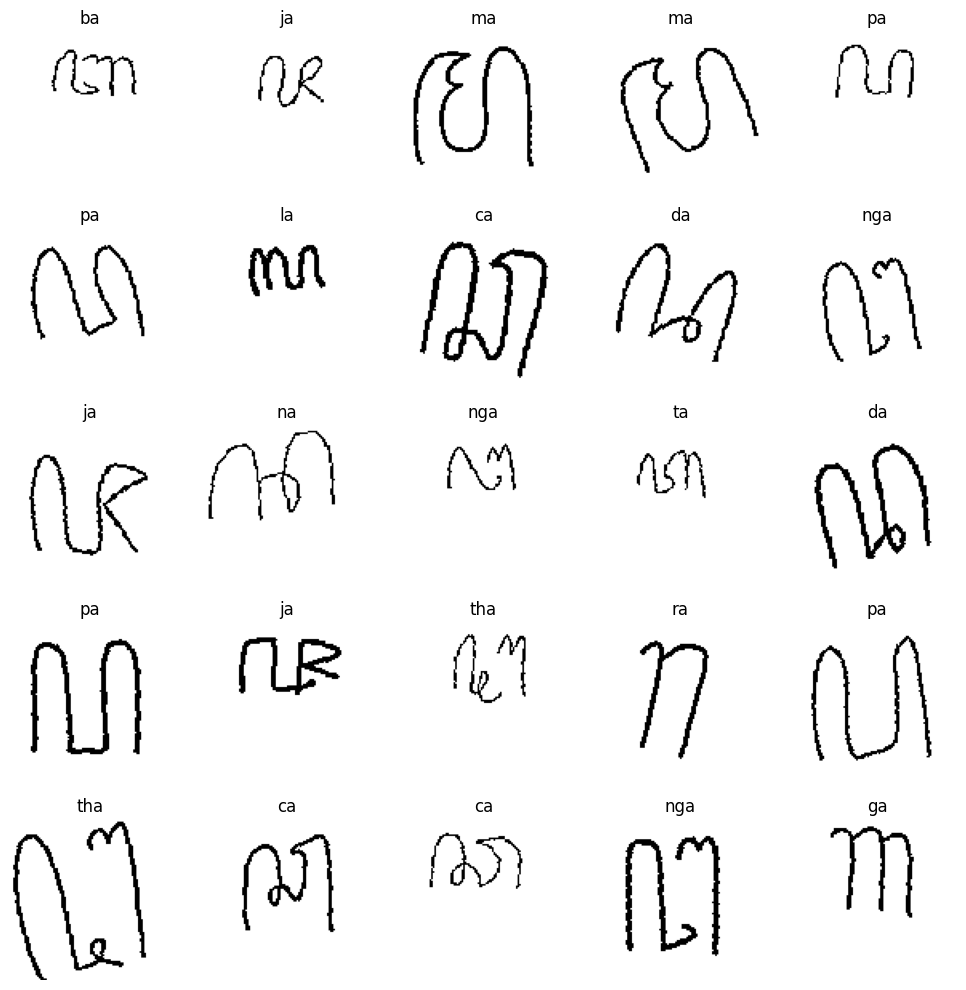

In [13]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(10, 10))

for img, label, ax in zip(feature, label, axs.flatten()):
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    label = list(label_encoded.keys())[list(label_encoded.values()).index(label)]
    ax.set_title(label)

plt.tight_layout()
plt.show()

# Build Model

In [14]:
import torch.nn as nn
from torchvision.models import MobileNet_V2_Weights
from torchvision.models import mobilenet_v2


class HanacarakaMobileNetV2(nn.Module):
    """
    MobileNetV3 were used as the baseline model. It's a CNN based architecture that were designed for mobile and edge devices.
    """
    def __init__(self, num_classes):
        super().__init__()
        self.model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)
        self.freeze()

        self.model.classifier = nn.Sequential(
            nn.Linear(1280, 256),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(256, num_classes),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

    def freeze(self):
        for param in self.model.parameters():
            param.requires_grad = False

    def unfreeze(self):
        for param in self.model.parameters():
            param.requires_grad = True

# Train Model

In [15]:
def train(
        model, train_loader, val_loader, criterion, optimizer, early_stop_epochs=5, max_epochs=20,
        history = None
):
    best_val_accuracy = 0.0
    best_epoch = 0
    epoch = 0

    while epoch < max_epochs:
        model.train()
        train_loss = 0.0
        val_loss = 0.0
        correct_preds_train = 0
        total_preds_train = 0
        correct_preds = 0
        total_preds = 0

        for feature, label in train_loader:
            feature, label = feature.to(device), label.to(device)

            optimizer.zero_grad()
            output = model(feature)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            _, predicted_train = torch.max(output.data, 1)
            total_preds_train += label.size(0)
            correct_preds_train += (predicted_train == label).sum().item()

        train_accuracy = correct_preds_train / total_preds_train

        model.eval()
        with torch.no_grad():
            for feature, label in val_loader:
                feature, label = feature.to(device), label.to(device)

                output = model(feature)
                loss = criterion(output, label)

                val_loss += loss.item()

                _, predicted = torch.max(output.data, 1)
                total_preds += label.size(0)
                correct_preds += (predicted == label).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct_preds / total_preds
        
        if history is not None:
            history.append((train_loss/len(train_loader), avg_val_loss, train_accuracy, val_accuracy))
        
        print(
            f'Epoch {epoch+1} | '
            f'Train Loss: {train_loss/len(train_loader):.4f} | '
            f'Train Accuracy: {train_accuracy:.4f} | '
            f'Val Loss: {avg_val_loss:.4f} | '
            f'Val Accuracy: {val_accuracy:.4f} | '
        )

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_epoch = epoch
        elif (epoch - best_epoch) >= early_stop_epochs:
            print('Early Stopping...')
            break

        epoch += 1

    return model

In [16]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = HanacarakaMobileNetV2(num_classes=len(label_encoded)).to(device)
hist_train = []

criterion = nn.NLLLoss()

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 68.4MB/s]


## Model Summary

In [17]:
!pip install torchviz

  Preparing metadata (setup.py) ... - done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=eef374171710f86c380b9c9cf87c7d3b9b4771df71c22396ba898bf6994a8c38
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


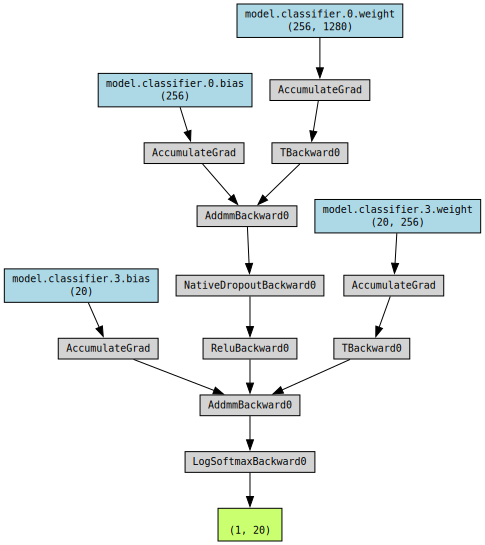

In [18]:
import torch
from torchviz import make_dot

model = model.to(device)

dummy_input = torch.zeros(1, 3, 100, 100).to(device)

out = model(dummy_input)

make_dot(out, params=dict(model.named_parameters()))

## 1. Learning Rate 1e-3

In [19]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

model = train(model, train_loader, val_loader, criterion, optimizer, early_stop_epochs = 2, max_epochs = 15, history=hist_train)

Epoch 1 | Train Loss: 2.6409 | Train Accuracy: 0.1995 | Val Loss: 2.1562 | Val Accuracy: 0.3844 | 
Epoch 2 | Train Loss: 2.1409 | Train Accuracy: 0.3353 | Val Loss: 1.8635 | Val Accuracy: 0.4241 | 
Epoch 3 | Train Loss: 1.9684 | Train Accuracy: 0.3847 | Val Loss: 1.7399 | Val Accuracy: 0.4539 | 
Epoch 4 | Train Loss: 1.8516 | Train Accuracy: 0.4205 | Val Loss: 1.6109 | Val Accuracy: 0.4989 | 
Epoch 5 | Train Loss: 1.7980 | Train Accuracy: 0.4307 | Val Loss: 1.6151 | Val Accuracy: 0.4981 | 
Epoch 6 | Train Loss: 1.7526 | Train Accuracy: 0.4412 | Val Loss: 1.5065 | Val Accuracy: 0.5202 | 
Epoch 7 | Train Loss: 1.6982 | Train Accuracy: 0.4663 | Val Loss: 1.4902 | Val Accuracy: 0.5446 | 
Epoch 8 | Train Loss: 1.7028 | Train Accuracy: 0.4550 | Val Loss: 1.4472 | Val Accuracy: 0.5408 | 
Epoch 9 | Train Loss: 1.6464 | Train Accuracy: 0.4830 | Val Loss: 1.4404 | Val Accuracy: 0.5454 | 
Epoch 10 | Train Loss: 1.6640 | Train Accuracy: 0.4817 | Val Loss: 1.4171 | Val Accuracy: 0.5561 | 
Epoch 11 

## 2. Learning Rate 1e-4

In [20]:
model.unfreeze()

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-3)

model = train(model, train_loader, val_loader, criterion, optimizer, early_stop_epochs = 6, max_epochs = 40, history=hist_train)

Epoch 1 | Train Loss: 1.2509 | Train Accuracy: 0.5978 | Val Loss: 0.9326 | Val Accuracy: 0.7109 | 
Epoch 2 | Train Loss: 0.9142 | Train Accuracy: 0.6972 | Val Loss: 0.6899 | Val Accuracy: 0.7811 | 
Epoch 3 | Train Loss: 0.7429 | Train Accuracy: 0.7607 | Val Loss: 0.5177 | Val Accuracy: 0.8467 | 
Epoch 4 | Train Loss: 0.6106 | Train Accuracy: 0.8002 | Val Loss: 0.4593 | Val Accuracy: 0.8642 | 
Epoch 5 | Train Loss: 0.4974 | Train Accuracy: 0.8384 | Val Loss: 0.3797 | Val Accuracy: 0.8856 | 
Epoch 6 | Train Loss: 0.4383 | Train Accuracy: 0.8614 | Val Loss: 0.3286 | Val Accuracy: 0.8986 | 
Epoch 7 | Train Loss: 0.3732 | Train Accuracy: 0.8805 | Val Loss: 0.3175 | Val Accuracy: 0.8970 | 
Epoch 8 | Train Loss: 0.3445 | Train Accuracy: 0.8836 | Val Loss: 0.2740 | Val Accuracy: 0.9146 | 
Epoch 9 | Train Loss: 0.2980 | Train Accuracy: 0.9066 | Val Loss: 0.2594 | Val Accuracy: 0.9237 | 
Epoch 10 | Train Loss: 0.2684 | Train Accuracy: 0.9100 | Val Loss: 0.2784 | Val Accuracy: 0.9268 | 
Epoch 11 

## History Training

In [21]:
train_loss, val_loss, train_acc, val_acc = None, None, None, None

if hist_train:
    train_loss, val_loss, train_acc, val_acc = zip(*hist_train)

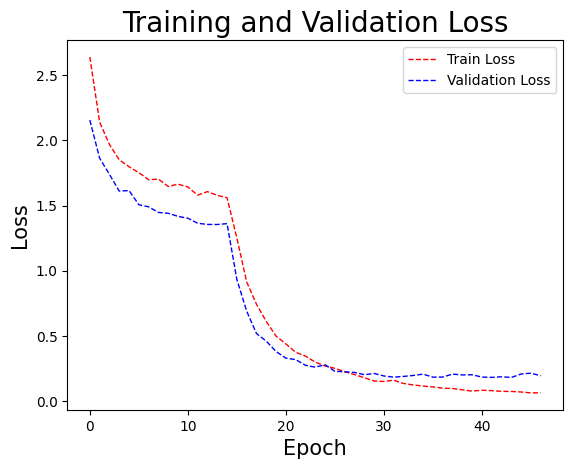

In [22]:
if hist_train:
    plt.plot(train_loss, label='Train Loss', color='red', linestyle='dashed', linewidth=1)
    plt.plot(val_loss, label='Validation Loss', color='blue', linestyle='dashed', linewidth=1)
    plt.title('Training and Validation Loss', fontsize=20)
    plt.xlabel('Epoch', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend()
    plt.show()

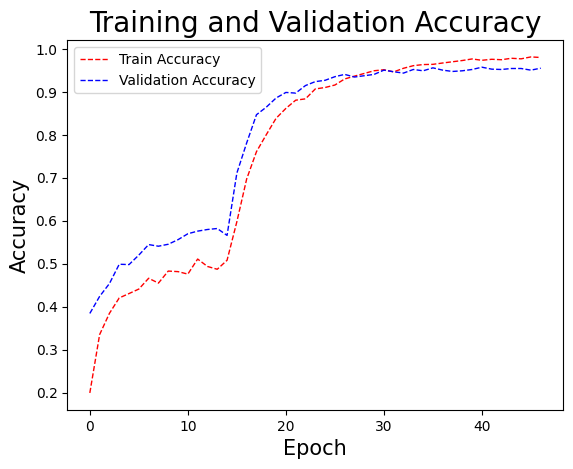

In [23]:
if hist_train:
    plt.plot(train_acc, label='Train Accuracy', color='red', linestyle='dashed', linewidth=1)
    plt.plot(val_acc, label='Validation Accuracy', color='blue', linestyle='dashed', linewidth=1)
    plt.title('Training and Validation Accuracy', fontsize=20)
    plt.xlabel('Epoch', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.legend()
    plt.show()

# Model Testing

In [24]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for feature, label in test_loader:
            feature, label = feature.to(device), label.to(device)

            output = model(feature)
            _, predicted = torch.max(output, 1)

            total += label.size(0)
            correct += (predicted == label).sum().item()

    return correct/total

In [25]:
test(model, test_loader)

0.9542682926829268

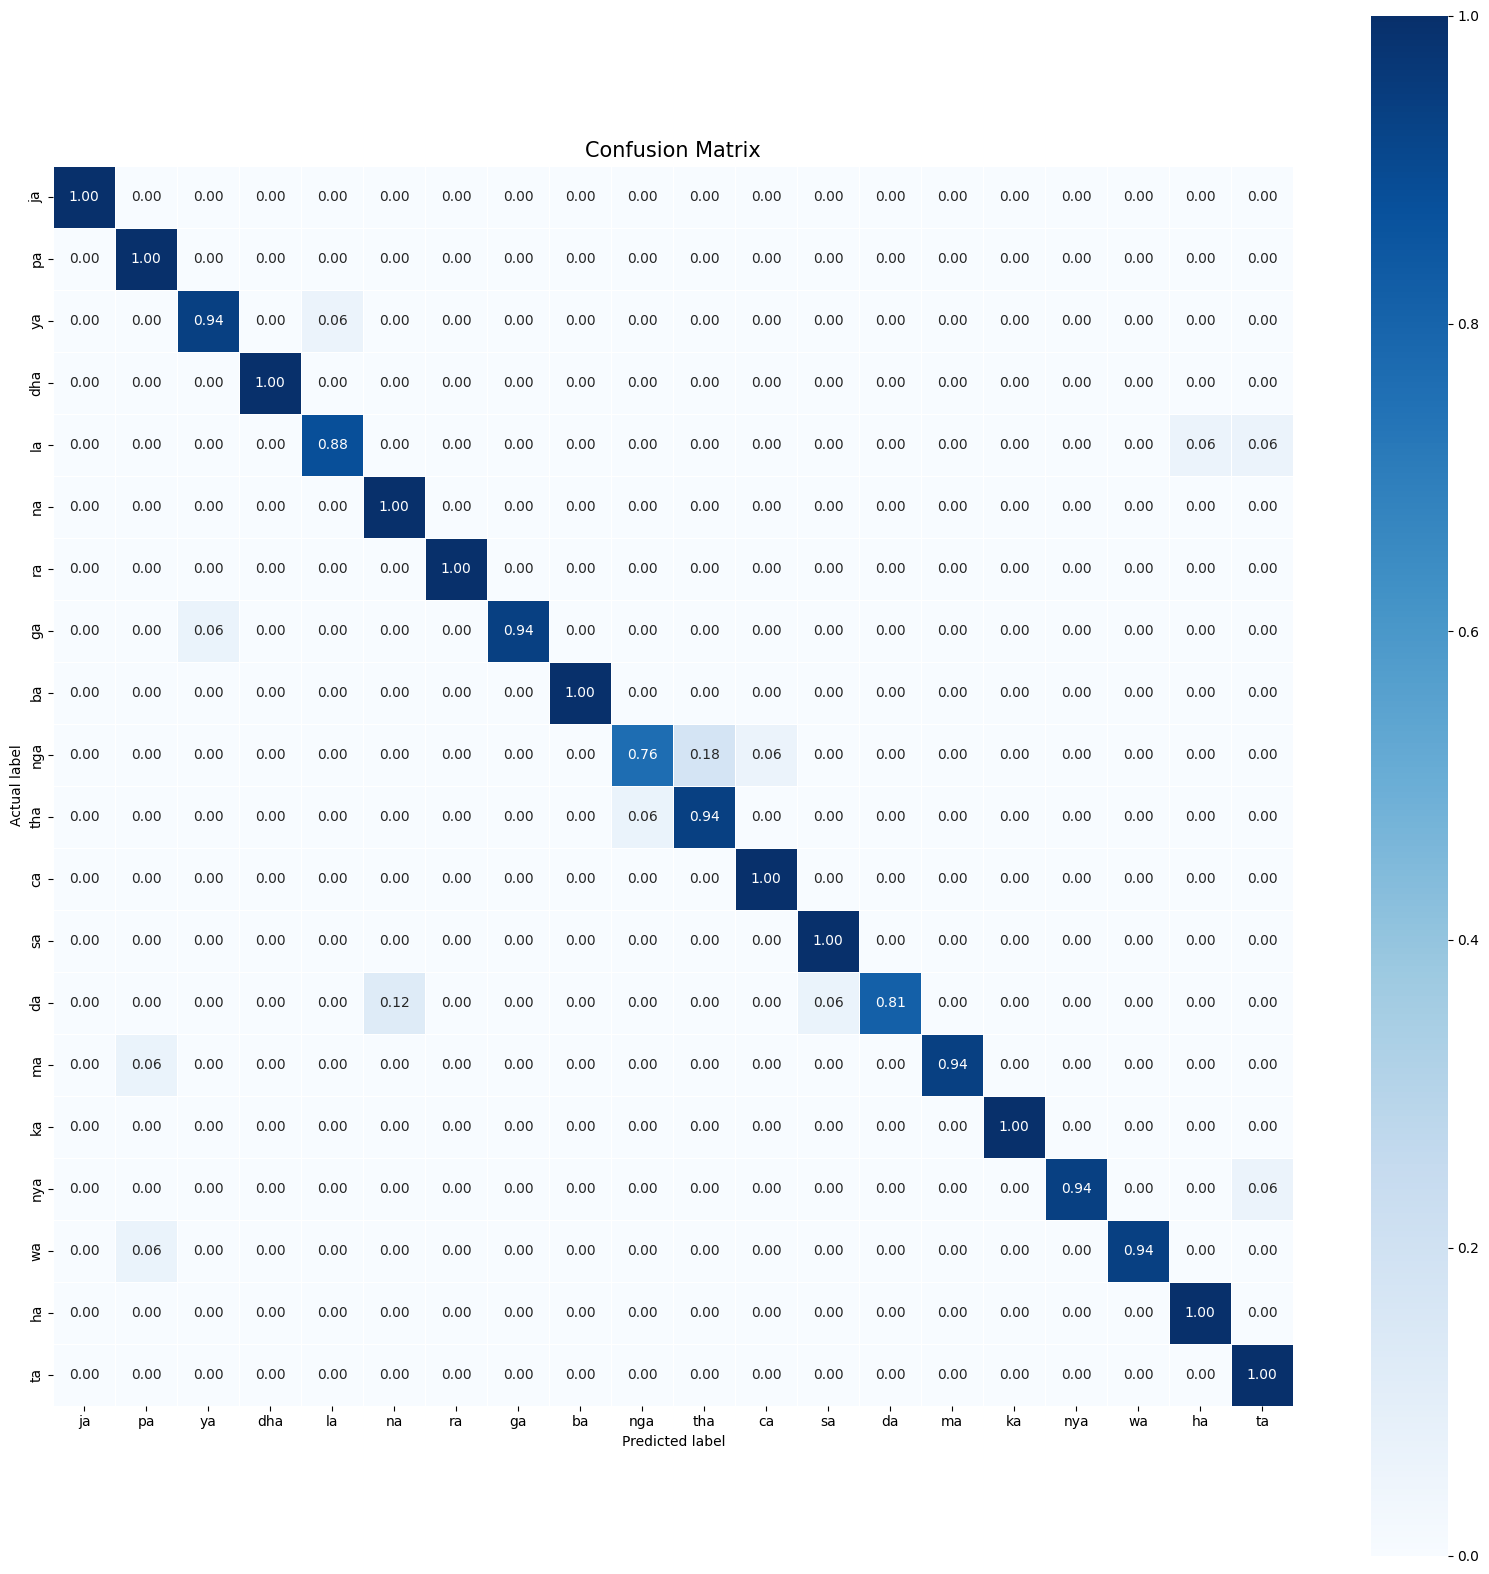

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for feature, label in test_loader:
        feature, label = feature.to(device), label.to(device)

        output = model(feature)
        _, predicted = torch.max(output, 1)

        y_true.extend(label.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

y_true_decoded = [list(label_encoded.keys())[list(label_encoded.values()).index(label)] for label in y_true]
y_pred_decoded = [list(label_encoded.keys())[list(label_encoded.values()).index(pred)] for pred in y_pred]

cm = confusion_matrix(y_true_decoded, y_pred_decoded, labels=list(label_encoded.keys()))

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues',
            xticklabels=list(label_encoded.keys()), yticklabels=list(label_encoded.keys()));

plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

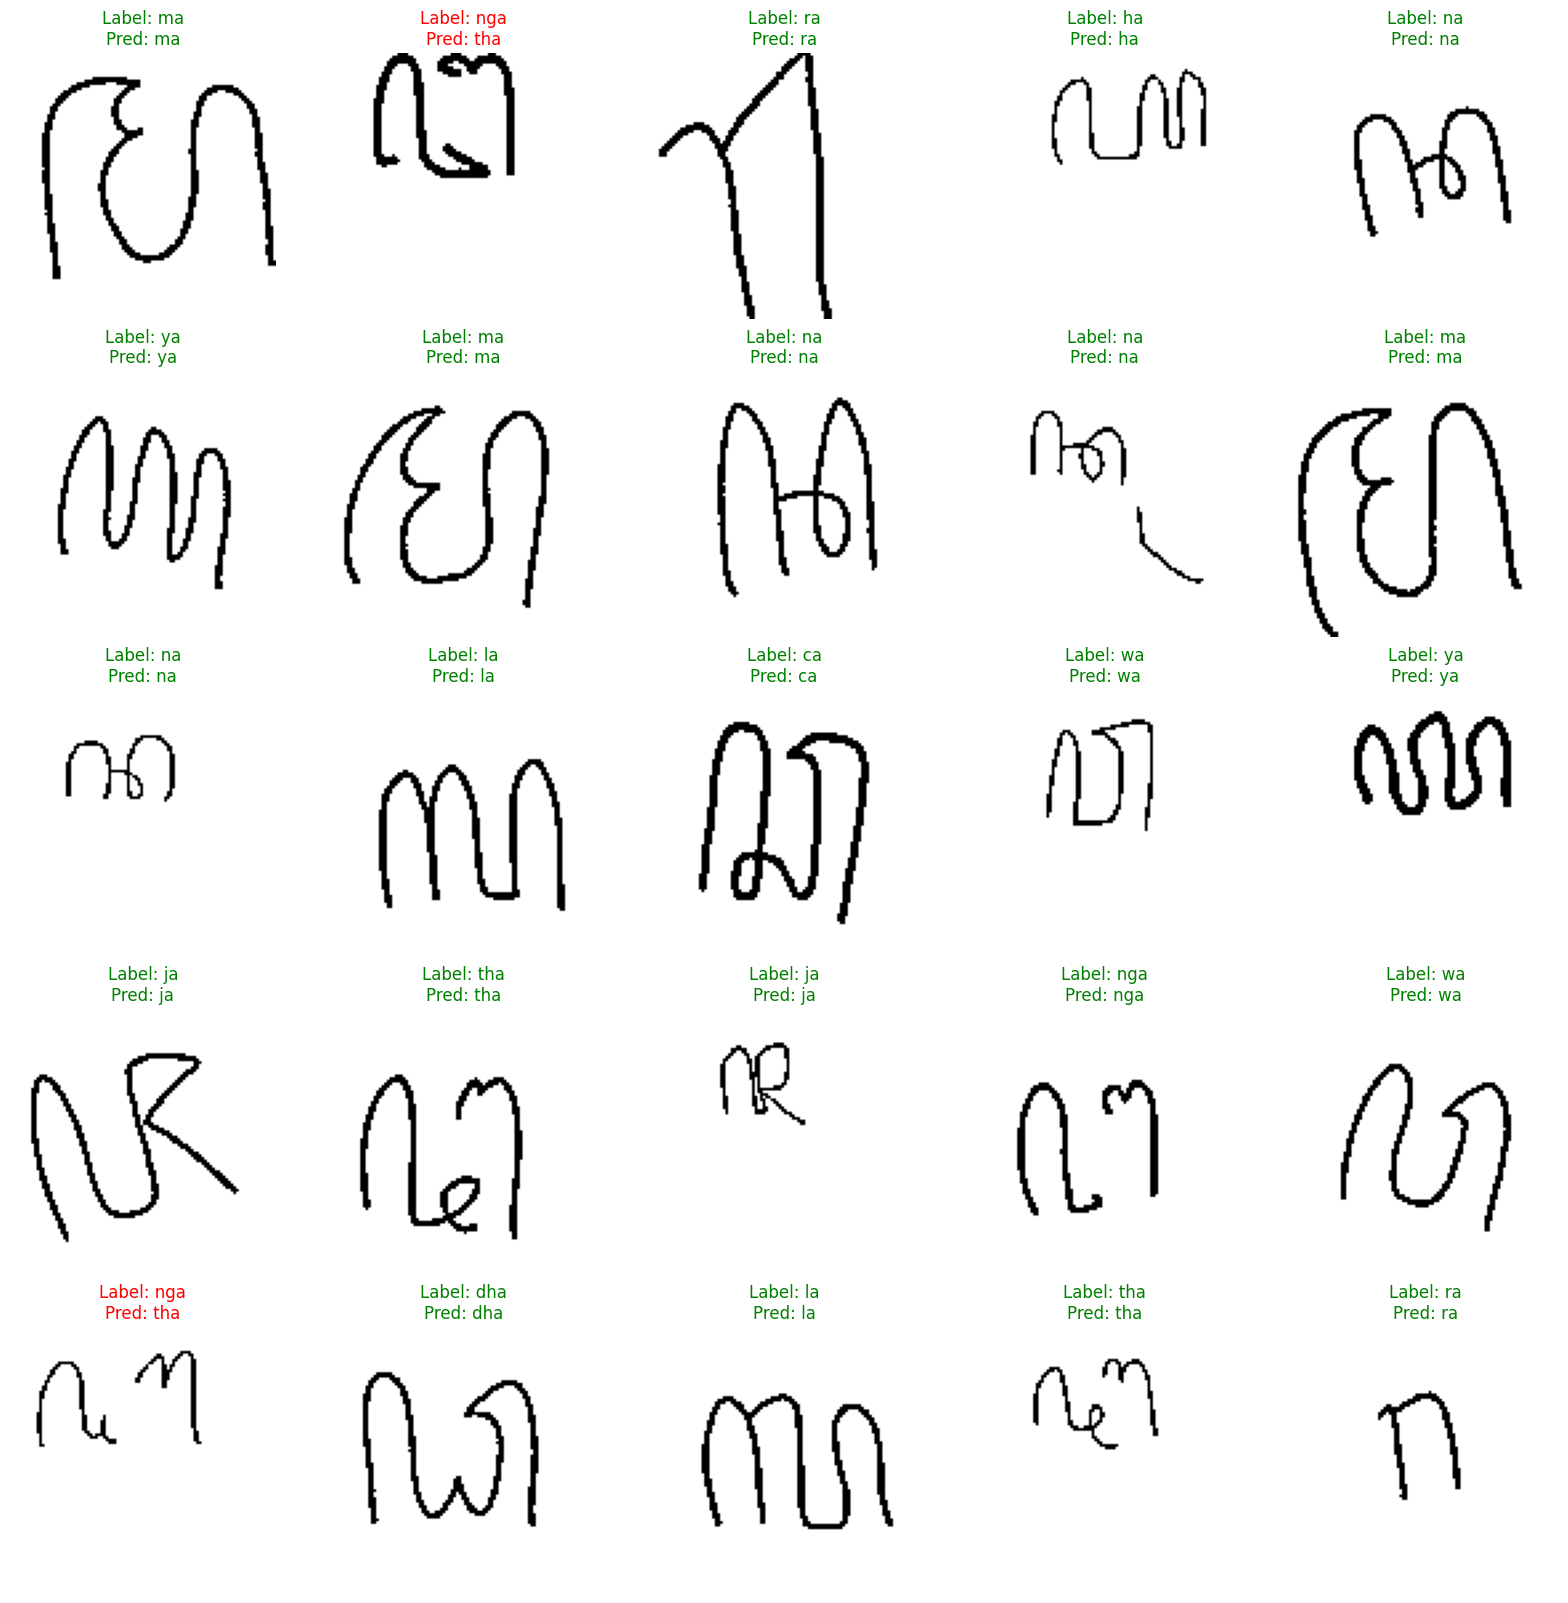

In [27]:
for feature, label in test_loader:
    feature, label = feature.to(device), label.to(device)
    output = model(feature)
    _, predicted = torch.max(output, 1)

    break

fig, axs = plt.subplots(5, 5, figsize=(20, 20))

for img, label, pred, ax in zip(feature, label, predicted, axs.flatten()):
    ax.imshow(img.permute(1, 2, 0).cpu().squeeze(), cmap='gray')
    ax.axis('off')
    label = list(label_encoded.keys())[list(label_encoded.values()).index(label)]
    pred = list(label_encoded.keys())[list(label_encoded.values()).index(pred)]
    if label == pred:
        color = 'green'
    else:
        color = 'red'
    ax.set_title(f'Label: {label}\nPred: {pred}', color=color)

# Save Model

In [28]:
torch.save(model.state_dict(), '/kaggle/working/hanacaraka_mobilenet.pth')